In [3]:
import sys
import os
import numpy as np
from matplotlib import pyplot as plt
import torch
import time
import imageio
import numpy as np
from PIL import Image
import scipy.signal

### Load data

In [4]:
def downsample(ar,factor):
    kernel = np.full((factor,factor),1/(factor**2))
    ar = scipy.signal.convolve2d(np.asarray(ar),kernel,mode='full')
    ar = ar[factor-1::factor,factor-1::factor]
    return ar
                 

In [64]:
directory = '/home/beast2020/Desktop/mingchi'

# rgb_dir = directory+'/EPFL_10_newsample_nadir/rgb/'
# rgb_dir = directory+'/EPFL_10_newsample_ob/rgb/'
# rgb_dir = directory+'/comballaz_nadir/rgb/'
rgb_dir = directory+'/comballaz_oblique/rgb/'
_files = os.listdir(rgb_dir)
_files.sort()
_rgb_files = [rgb_dir + f for f in _files]
_rgb_files.sort()


# dist_dir = directory+'/EPFL_10_newsample_nadir/dist/'
# dist_dir = directory+'/EPFL_10_newsample_ob/dist/'
# dist_dir = directory+'/comballaz_nadir/dist/'
dist_dir = directory+'/comballaz_oblique/dist/'
_files = os.listdir(dist_dir)
_files.sort()
_dist_files = [dist_dir + f for f in _files]
_dist_files.sort()


# pred_dir = directory+'/PMBANet_TOPO/Results/EPFL_nadir/distpng/'
# pred_dir = directory+'/PMBANet_TOPO/Results/EPFL_oblique/distpng/'
# pred_dir = directory+'/PMBANet_TOPO/Results/comballaz_nadir/distpng/'
pred_dir = directory+'/PMBANet_TOPO/Results/comballaz_oblique/distpng/'
# _files = os.listdir(pred_dir)
# _files.sort()
# _pred_files = [pred_dir + f for f in _files]
# _pred_files.sort()


guide_imgs = []
target_imgs= []
source_imgs= []
predict_imgs = []

for num in range(len(_rgb_files)):
    rgb_img = imageio.imread(_rgb_files[num])
    guide_imgs.append(rgb_img)
    pred_img = imageio.imread(pred_dir+str(num)+'.png')
    recover_img = pred_img[:480,:720]
    predict_imgs.append(recover_img)
    dist_img = torch.load(_dist_files[num])
    dist_img = dist_img.detach().cpu().numpy()
    target_imgs.append(dist_img)
    source_imgs.append(downsample(dist_img,8))
        
guide_imgs = np.asarray(guide_imgs)  
predict_imgs = np.asarray(predict_imgs)
predict_imgs = predict_imgs
target_imgs = np.asarray(target_imgs)
source_imgs = np.asarray(source_imgs)
error_imgs = target_imgs - predict_imgs

print('Guide:')
print(guide_imgs.shape)
print('max value in the image is: ' + str(guide_imgs.max()))
print('min value in the image is: ' + str(guide_imgs.min()))

print('Predict:')
print(predict_imgs.shape)
print('max value in the image is: ' + str(predict_imgs.max()))
print('min value in the image is: ' + str(predict_imgs.min()))

print('Target:')
print(target_imgs.shape)
print('max value in the image is: ' + str(target_imgs.max()))
print('min value in the image is: ' + str(target_imgs.min()))

print('Source:')
print(source_imgs.shape)
print('max value in the image is: ' + str(target_imgs.max()))
print('min value in the image is: ' + str(target_imgs.min()))



Guide:
(25, 480, 720, 3)
max value in the image is: 255
min value in the image is: 0
Predict:
(25, 480, 720)
max value in the image is: 255
min value in the image is: 0
Target:
(25, 480, 720)
max value in the image is: 889.32996
min value in the image is: 79.8521
Source:
(25, 60, 90)
max value in the image is: 889.32996
min value in the image is: 79.8521


In [65]:
n_img = len(predict_imgs)

### visualize

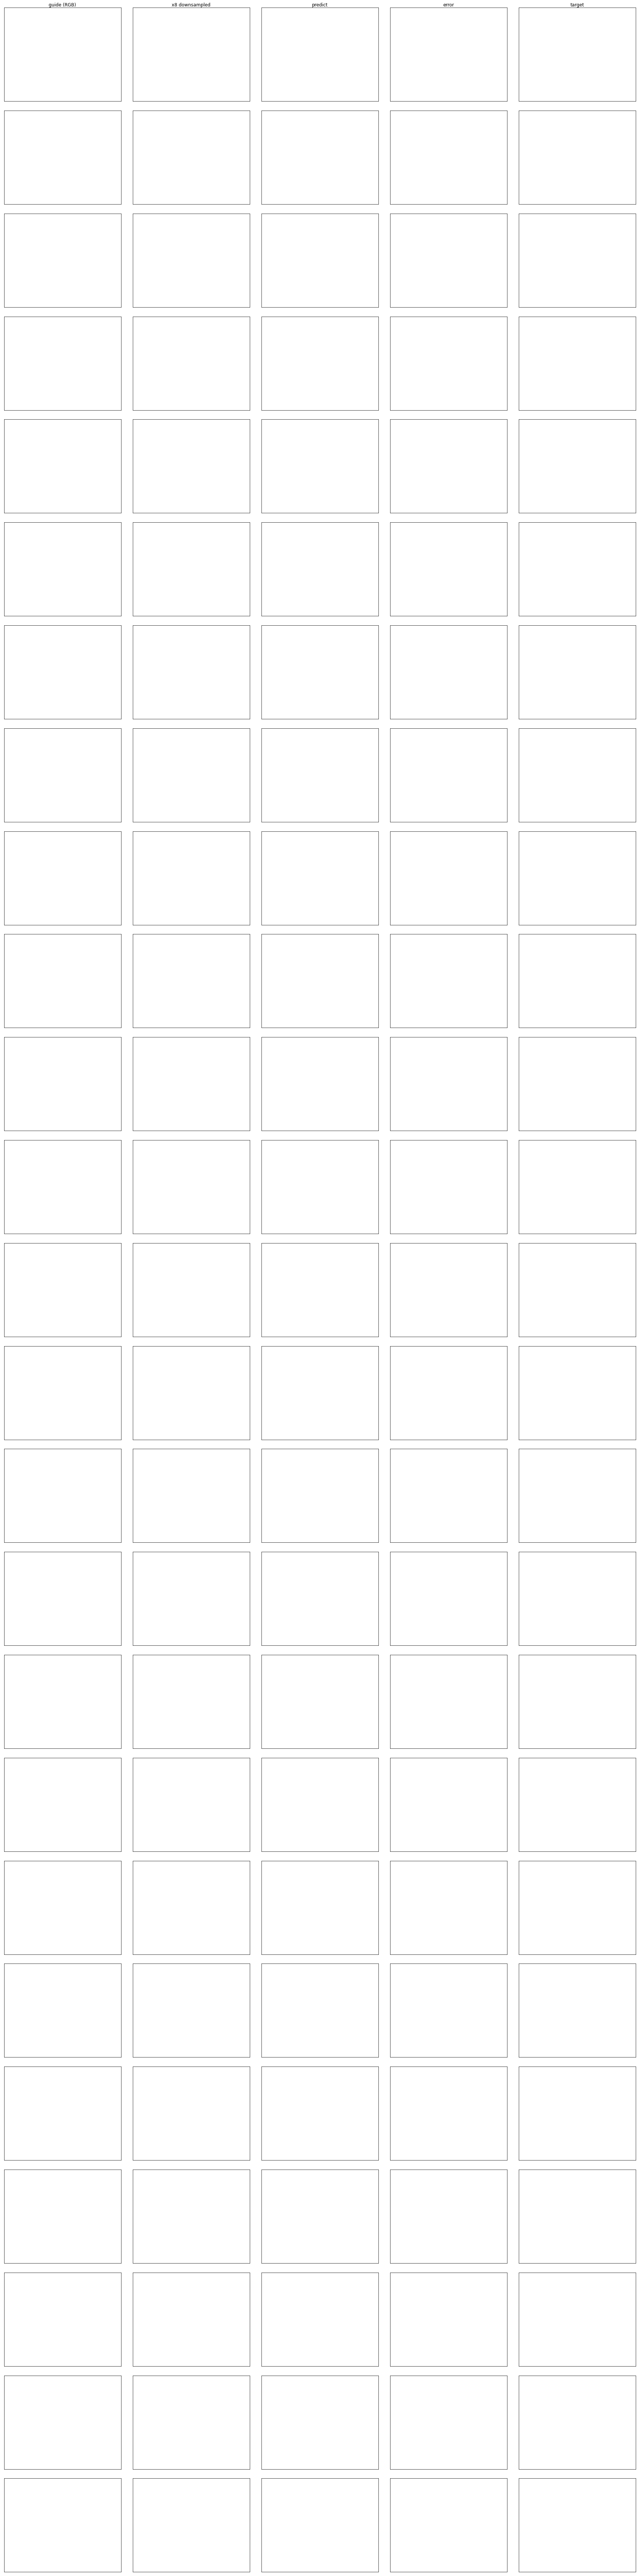

In [66]:
fig, axes = plt.subplots(n_img, 5, figsize=[6 * 5, 5 * n_img])
for axes_ in axes:
    for ax in axes_:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
labels = ['guide (RGB)', 'x8 downsampled', 'predict','error','target']
for i, ax in enumerate(axes[0]):
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(labels[i], fontsize=12)
fig.subplots_adjust(wspace=0.1, hspace=0.1)

In [67]:

for sample_i, sample in enumerate(range(n_img)):
    axes[sample_i][0].imshow(guide_imgs[sample])
    axes[sample_i][1].imshow(source_imgs[sample], cmap="Spectral")
    axes[sample_i][2].imshow(predict_imgs[sample], cmap="Spectral")
    p2 = axes[sample_i][3].imshow(error_imgs[sample],interpolation='none')
    fig.colorbar(p2, cax = fig.add_axes([0.745, 0.855 - 0.0304*sample_i , 0.004, 0.9/n_img/1.5]),shrink=0.68)
    p3 = axes[sample_i][4].imshow(target_imgs[sample], cmap="Spectral")
    fig.colorbar(p3, cax = fig.add_axes([0.91, 0.855 - 0.0304*sample_i , 0.004, 0.9/n_img/1.5]),shrink=0.68)



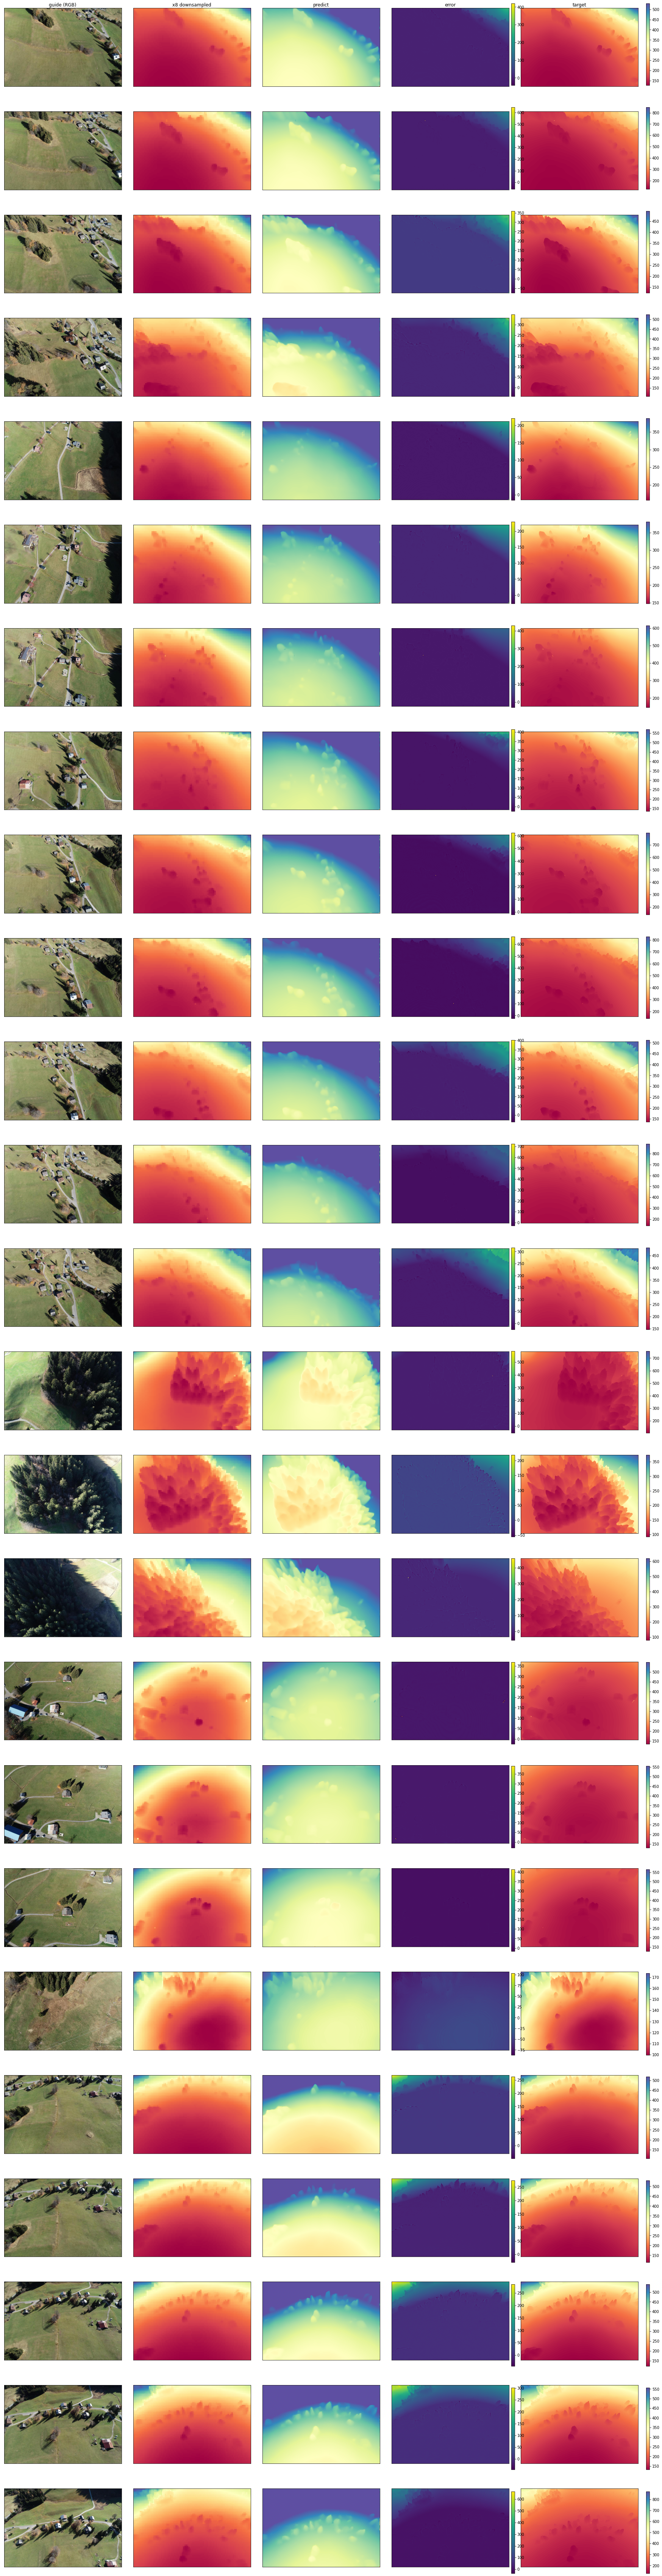

In [68]:
%matplotlib inline
fig

In [69]:
MAE = np.zeros((n_img,1))
for sample_i, sample in enumerate(range(n_img)):
    MAE[sample] = np.mean(np.abs(error_imgs[sample]))

In [70]:
print(MAE)
print('Min: '+str(np.min(MAE)))
print('Max: '+str(np.max(MAE)))
print('Mean: '+str(np.mean(MAE)))
print('Median: '+str(np.median(MAE)))

[[ 8.34210873]
 [10.02178192]
 [11.25730801]
 [12.94723511]
 [ 5.8959403 ]
 [ 6.62384844]
 [ 6.84473181]
 [10.10728264]
 [14.73136902]
 [17.66789246]
 [20.85937691]
 [22.96185112]
 [24.41730118]
 [ 1.83753347]
 [ 6.44300079]
 [ 6.36847496]
 [ 0.68400443]
 [ 0.61209762]
 [ 0.6982047 ]
 [53.21495819]
 [ 8.62440872]
 [12.41181469]
 [16.15101051]
 [19.09486771]
 [21.72484016]]
Min: 0.6120976209640503
Max: 53.21495819091797
Mean: 12.821729743480683
Median: 10.107282638549805


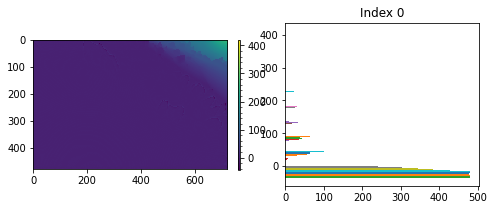

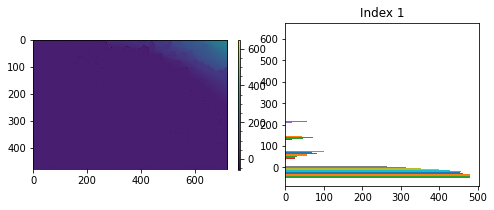

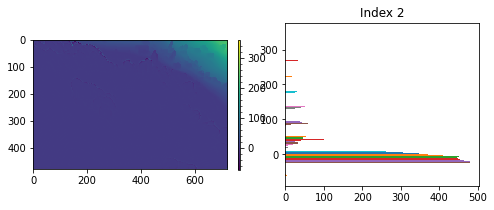

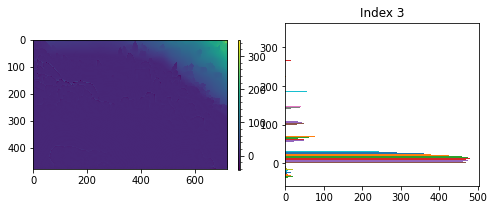

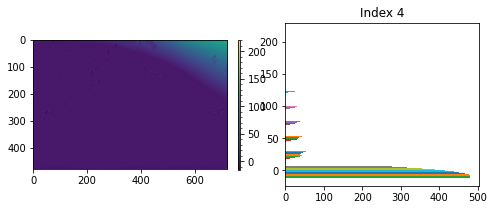

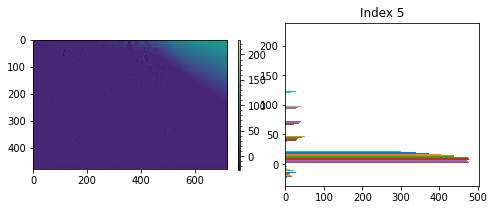

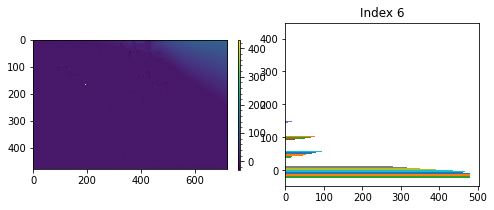

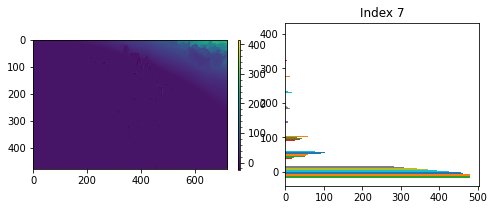

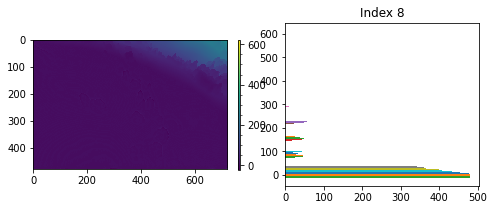

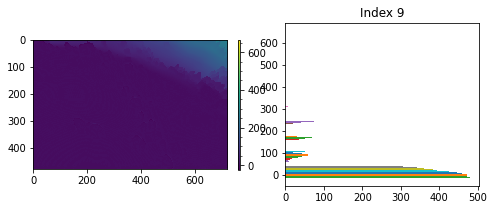

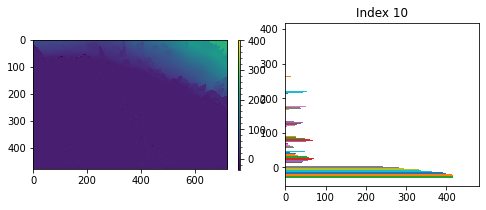

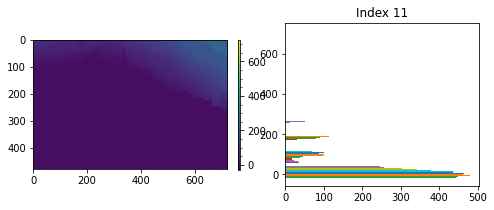

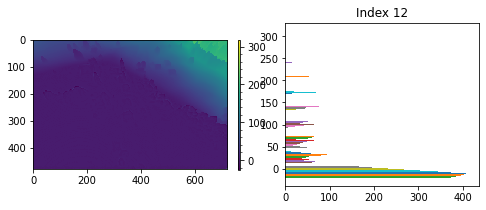

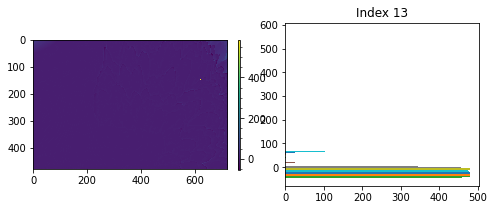

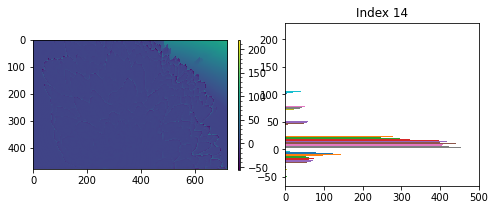

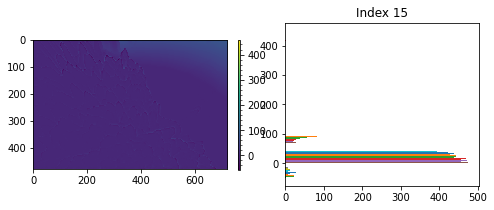

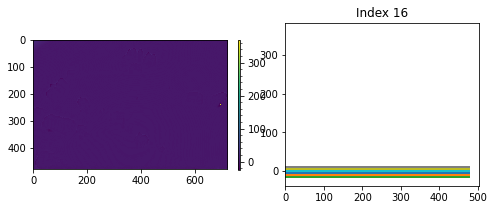

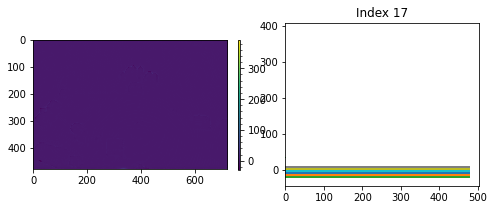

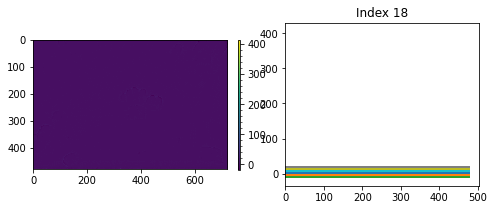

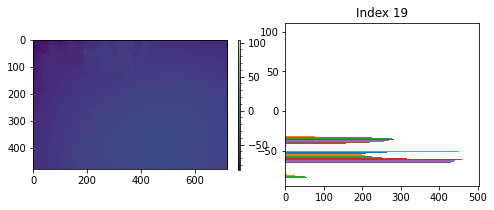

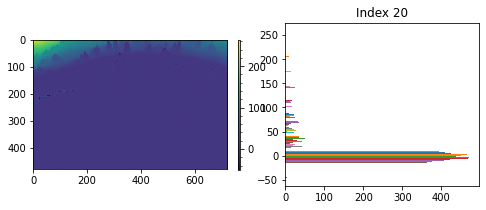

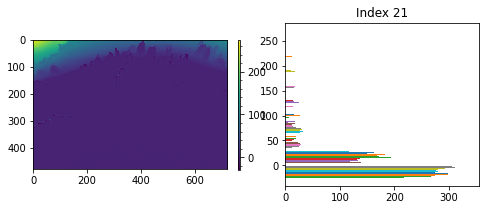

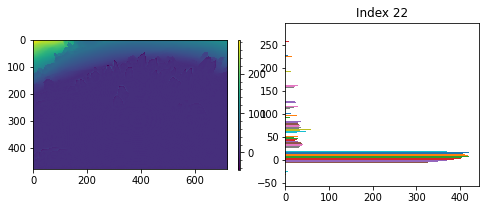

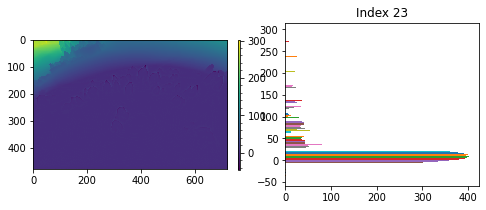

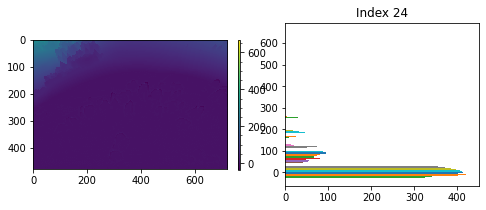

In [71]:
%matplotlib inline    
for i in range(n_img):
    fig, (ax1, ax2) = plt.subplots(figsize=(8, 3), ncols=2)
    err = ax1.imshow(error_imgs[i],interpolation='none')
    cbar = fig.colorbar(err,cax = fig.add_axes([0.48,0.2,0.005,0.6]))
    cbar.minorticks_on()
    ax2.hist(error_imgs[i],orientation="horizontal");
    ax2.title.set_text('Index ' +str(i))
    fig.subplots_adjust(wspace=0.3, hspace=0.1)
    plt.show()



In [45]:
# Save for later, incase want to do bar plot
MAE_EPFL_nadir = MAE 

In [54]:
MAE_EPFL_ob = MAE

In [63]:
MAE_comballaz_nadir = MAE

In [72]:
MAE_comballaz_oblique = MAE